In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# MetaData

#### These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. 
#### The analysis determined the quantities of 13 constituents found in each of the three types of wines.

##### The attributes are:
##### 1) Alcohol
##### 2) Malic acid
##### 3) Ash
##### 4) Alcalinity of ash
##### 5) Magnesium
##### 6) Total phenols
##### 7) Flavanoids
##### 8) Nonflavanoid phenols
##### 9) Proanthocyanins
##### 10)Color intensity
##### 11)Hue
##### 12)OD280/OD315 of diluted wines
##### 13)Proline

## 2. Tabulate and visualize the distribution of the numeric variables.

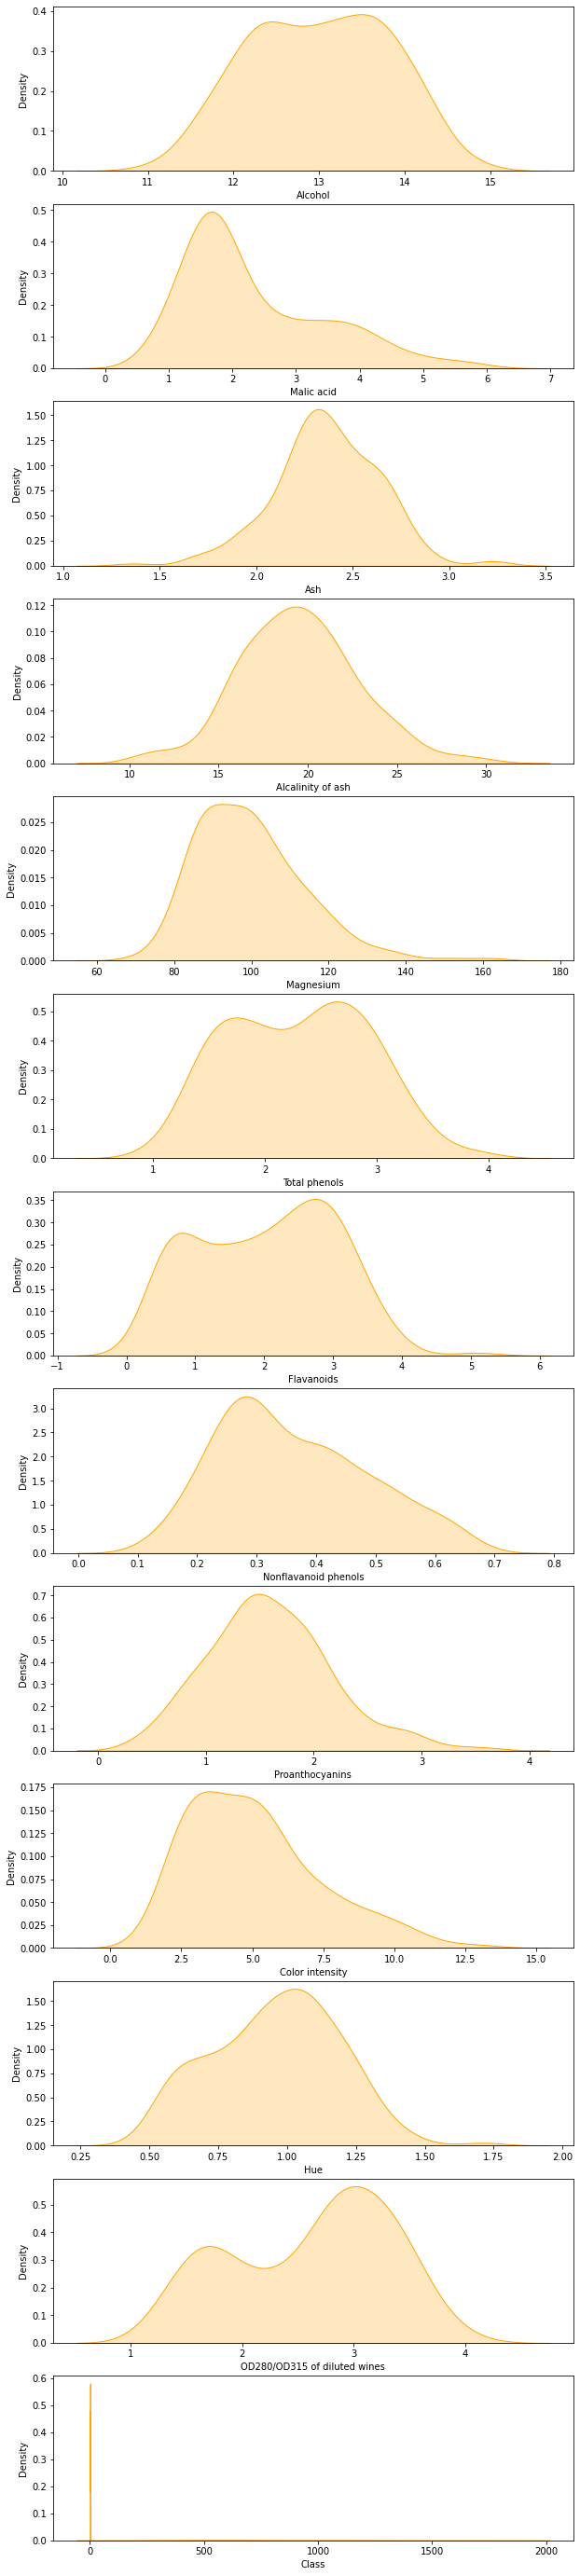

<Figure size 432x288 with 0 Axes>

In [3]:
fig, axes = plt.subplots(13, 1, figsize=(10,50))

for col in df.columns:
    idx = df.columns.get_loc(col)
    #print(type(idx))
    sns.kdeplot(ax=axes[idx-1], x=df[col], shade = True, color = 'orange')
plt.show()
plt.subplots_adjust(left=0.1, bottom=0.2, right=1.0, top=0.9, wspace=0.4, hspace=0.4)

## 3. Perform the required preprocessing , 70,30 split and build a classifier using the Multi-Layer Perceptron Classifier model available in SciKit Learn. Use 3 layers with the same number of neurons as there are features along with 500 max iterations

In [4]:
sc = StandardScaler()
X = df.drop('Class', axis=1)
y = df['Class']
X = sc.fit_transform(X)

#splitting data into training and test with test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#building the MLP Classifier model
clf = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred)*100)

Accuracy Score:  94.44444444444444


## 4. Tabulate the precision, recall and F1-score

In [5]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.91      0.95      0.93        21
           3       0.93      0.93      0.93        14

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



## 5. Display the MLP weights and biases after training your model.

In [6]:
#displaying MLP weights after training the models
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.52285329 -0.13909661 -0.4367408   0.22376285 -0.21688555 -0.26954395
  0.3838738  -0.02282758 -0.44143599 -0.54710974  0.25257771 -0.05634854
  0.04377652], 
0 1 [-0.19265862  0.08787834 -0.02310698  0.44288265 -0.27729596 -0.21247248
 -0.38465164  0.23354471  0.21114836  0.47524316 -0.56261902 -0.1546083
 -0.265429  ], 
0 2 [ 0.25054073  0.07008376 -0.08669603 -0.5122873   0.39697136  0.35631329
  0.59171693 -0.3965711   0.38862388  0.00096234  0.30068876  0.60215442
  0.36974912], 
0 3 [ 0.21510391  0.13549885  0.44915228 -0.33705688  0.23371545  0.09789149
 -0.2746847  -0.18156579 -0.25530976  0.42020399 -0.27696025 -0.09429233
  0.57861874], 
0 4 [ 0.09290828 -0.38261502 -0.43057978  0.20606935  0.30528221  0.36359136
 -0.32609796 -0.13236124 -0.14134115  0.32058619 -0.13369957 -0.13731781
  0.24685274], 
0 5 [-0.19995678 -0.52624674 -0.26743698 -0.27783834 -0.29746235 -0.45806972
  0.32017258 -0.21546254 -0.2160643   0.08751972 -0.20722804  0.23090648
 -0.20125198], 
0 6 [

In [7]:
#displaying biases after training the model
print('Bias values for first hidden layer: ')
print(clf.intercepts_[0])
print('Bias values for second hidden layer: ')
print(clf.intercepts_[1])
print('Bias values for third hidden layer: ')
print(clf.intercepts_[2])

Bias values for first hidden layer: 
[ 0.32222096  0.35499622  0.25916399  0.40375261 -0.34230273  0.30674973
 -0.1090002   0.39795904 -0.10765246 -0.01118061 -0.02864642 -0.05850799
  0.61671772]
Bias values for second hidden layer: 
[-0.23884477  0.63876844 -0.29925402  0.27757395  0.0101383  -0.18721173
 -0.33357199  0.22993566  0.54986091  0.08709687  0.10152276  0.1262057
 -0.12654451]
Bias values for third hidden layer: 
[-0.14882371 -0.10224339  0.48051163 -0.22023471 -0.37946687  0.48397186
 -0.00910327  0.25928441 -0.13025222  0.1056154  -0.43877987  0.42104579
  0.23113816]
